In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 80-20.csv')

# x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 80-20.csv')

# y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 80-20.csv')

# y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson 80-20.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train Without Yeo Johnson 80-20.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test Without Yeo Johnson 80-20.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train Without Yeo Johnson 80-20.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test Without Yeo Johnson 80-20.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.913664,-0.079176,-0.735307,-0.126745,-0.363002,-0.813466,0.192980,1.673355,-1.480405,-0.407616,-0.565211
1,0.913664,0.794985,-0.147355,-0.290075,0.220611,-0.813466,2.421612,-0.690525,-0.050570,-0.218776,0.616805
2,-1.094494,-0.759080,-1.015284,-0.535070,-0.790985,-1.276930,-0.880065,-0.217749,-1.174012,0.095957,-1.156220
3,-1.094494,0.503598,3.566950,4.310388,-0.246279,-0.272757,0.605689,-1.872465,0.153692,0.033011,0.222800
4,0.913664,-0.856209,0.048629,-0.303686,-0.401910,0.036219,2.586696,-0.690525,-0.867619,0.725424,-1.156220
...,...,...,...,...,...,...,...,...,...,...,...
206,-1.094494,0.017953,0.160620,0.050196,-1.141154,-0.118269,-0.797523,1.436967,1.583527,-0.029936,-0.959217
207,-1.094494,-0.564821,-0.483328,-0.712011,-1.024431,0.499683,-0.302272,-0.690525,1.072871,-0.218776,-0.368208
208,0.913664,0.794985,3.566950,4.400417,0.843133,1.503856,0.605689,-0.217749,1.787789,0.033011,1.207814
209,-1.094494,0.503598,0.244613,1.139063,0.026074,-0.504489,0.110438,-0.454137,-0.561226,-0.155829,1.207814


In [5]:
print(y_train['Class'].value_counts())

2    108
0     71
1     32
Name: Class, dtype: int64


# Information Gain using Mutual info classifier

In [6]:
# from sklearn.feature_selection import mutual_info_classif

# importances = mutual_info_classif(x_train, y_train)

# feat_importances = pd.Series(importances)
# feat_importances.index = x_train.columns
# feat_importances.sort_values(ascending=True)
# #feat_importances.plot(kind='barh', color = 'teal')
# #plt.show()
# feat_importances.nlargest(11).plot(kind='barh', color = 'teal')

In [7]:
# IG_Top_4_X = x_train[['HbA1c', 'BMI', 'AGE', 'VLDL']]
# IG_Top_5_X = x_train[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG']]
# IG_Top_7_X = x_train[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea']]
# IG_Top_9_X = x_train[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea', 'Cr', 'Gender']]
# IG_Top_11_X = x_train[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea', 'Cr', 'Gender', 'HDL', 'LDL']]
# x_train = IG_Top_4_X

In [8]:
# IG_Top_4_X = x_test[['HbA1c', 'BMI', 'AGE', 'VLDL']]
# IG_Top_5_X = x_test[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG']]
# IG_Top_7_X = x_test[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea']]
# IG_Top_9_X = x_test[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea', 'Cr', 'Gender']]
# IG_Top_11_X = x_test[['HbA1c', 'BMI', 'AGE', 'VLDL', 'TG', 'Chol', 'Urea', 'Cr', 'Gender', 'HDL', 'LDL']]
# x_test = IG_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9433962264150944
[[25  0  0]
 [ 1  5  2]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.62      0.77         8
           2       0.91      1.00      0.95        20

    accuracy                           0.94        53
   macro avg       0.96      0.88      0.90        53
weighted avg       0.95      0.94      0.94        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9475524475524475
f1 Score  0.9379484740195062
Recall  0.9433962264150944
Specificity/TNR: 1.0
Cohen Kappa: 0.905300774270399
AUC Score  0.9808369408369408


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9433962264150944,
  0.9475524475524475,
  0.9433962264150944,
  0.9379484740195062,
  0.905300774270399,
  0.9808369408369408]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02391837, 0.00981286, 0.01805389, 0.02044075, 0.02713029,
        0.01936388, 0.01993408, 0.01756182, 0.02153244, 0.01493647,
        0.0198653 , 0.01805718, 0.02306211, 0.02087333, 0.01601617,
        0.01927028, 0.0246418 , 0.01421158, 0.01468554, 0.0180465 ,
        0.04164202, 0.02118905, 0.0212121 , 0.01713173, 0.02517927,
        0.02300031, 0.02106876, 0.01974785, 0.02312162, 0.02119331,
        0.02095249, 0.02288516, 0.02609653, 0.02046714, 0.0172817 ,
        0.0244298 , 0.02746778, 0.02141013, 0.01759508, 0.02353086,
        0.0433125 , 0.02279615, 0.02007208, 0.01749866, 0.02274833,
        0.02428098, 0.01952469, 0.01479368, 0.02051835, 0.0251313 ,
        0.01893122, 0.01798503, 0.02743843, 0.02359169, 0.01626241,
        0.02426164, 0.03075683, 0.02194233, 0.02254515, 0.02268429,
        0.04146528, 0.0251631 , 0.01995895, 0.01664457, 0.02722235,
        0.02657545, 0.01825473, 0.01516216, 0.01860511, 0.02315326,
        0.01598608, 0.01580625,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023918,0.006092,0.002395,0.000489,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.727273,0.714286,...,0.666667,0.714286,0.619048,0.666667,0.714286,0.761905,0.666667,0.687013,0.044656,306
1,0.009813,0.001070,0.001710,0.000511,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.954545,0.857143,...,0.904762,0.952381,0.761905,0.857143,0.904762,0.952381,0.857143,0.881169,0.061423,86
2,0.018054,0.004984,0.002699,0.000894,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.727273,0.904762,...,0.809524,0.857143,0.714286,0.904762,0.761905,0.904762,0.761905,0.806061,0.076681,210
3,0.020441,0.002108,0.003365,0.000463,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.863636,0.571429,...,0.761905,0.809524,0.761905,0.761905,0.761905,0.761905,0.761905,0.753030,0.070978,267
4,0.027130,0.002885,0.003999,0.001255,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.818182,0.857143,...,0.904762,0.904762,0.761905,0.857143,0.761905,0.761905,0.857143,0.829437,0.052778,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.014764,0.000598,0.002519,0.000481,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.772727,0.714286,...,0.857143,0.857143,0.809524,0.857143,0.809524,0.809524,0.809524,0.810606,0.041491,189
396,0.042644,0.001439,0.005540,0.000726,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.727273,0.714286,...,0.857143,0.809524,0.761905,0.857143,0.809524,0.809524,0.809524,0.796537,0.045773,258
397,0.036951,0.008012,0.002195,0.000598,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.863636,0.904762,...,0.904762,0.952381,0.714286,0.952381,0.904762,0.904762,0.904762,0.881602,0.067981,56
398,0.014797,0.001546,0.002500,0.000505,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,316


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.687013
1,1,linear,0.881169
2,1,poly,0.806061
3,1,sigmoid,0.753030
4,1,rbf,0.829437
...,...,...,...
395,20,sigmoid,0.810606
396,20,rbf,0.796537
397,20,linear,0.881602
398,20,poly,0.512121


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.8954545454545455
{'C': 5, 'gamma': 1, 'kernel': 'linear'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      0.75      0.80         8
           2       0.90      0.95      0.93        20

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.91        53
weighted avg       0.94      0.94      0.94        53



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9424977538185084
f1 Score  0.9421997238840313
Recall  0.9433962264150944
Specificity/TNR: 1.0
Cohen Kappa: 0.9069086651053864
AUC Score  0.9888047138047139


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8954545454545455,
  0.9424977538185084,
  0.9433962264150944,
  0.9421997238840313,
  0.9069086651053864,
  0.9888047138047139]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.905
Testing Accuracy: 0.906
[[23  2  0]
 [ 0  6  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.67      0.75      0.71         8
           2       0.90      0.95      0.93        20

    accuracy                           0.91        53
   macro avg       0.86      0.87      0.86        53
weighted avg       0.91      0.91      0.91        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9137466307277629
f1 Score  0.9083391985418189
Recall  0.9056603773584906
Specificity/TNR: 0.92
Cohen Kappa: 0.8478760045924225
AUC Score  0.9587830687830688


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9433962264150944,
  0.9475524475524475,
  0.9433962264150944,
  0.9379484740195062,
  0.905300774270399,
  0.9808369408369408],
 'LR': [0.9056603773584906,
  0.9137466307277629,
  0.9056603773584906,
  0.9083391985418189,
  0.8478760045924225,
  0.9587830687830688]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00502644, 0.02275388, 0.00418615, 0.01604166, 0.00513072,
        0.0230684 , 0.00474799, 0.01709375, 0.00577271, 0.02369251,
        0.00435576, 0.01708348, 0.00598319, 0.02818868, 0.00477316,
        0.01704528, 0.00618277, 0.02464223, 0.00489092, 0.0173008 ,
        0.00656369, 0.03084292, 0.00642395, 0.02067161, 0.00801463,
        0.02830689, 0.00589967, 0.01996775, 0.00764749, 0.0288085 ,
        0.00581379, 0.01937428, 0.00735028, 0.0293283 , 0.00567706,
        0.01967609, 0.0075511 , 0.02848089, 0.00606205, 0.01715467]),
 'std_fit_time': array([0.00100732, 0.00147279, 0.00040207, 0.00121927, 0.00045664,
        0.00082968, 0.00052817, 0.00109913, 0.00074389, 0.00133414,
        0.00043306, 0.0010685 , 0.0007726 , 0.00879589, 0.00074373,
        0.00084658, 0.00060185, 0.00227354, 0.00053812, 0.00099851,
        0.00102857, 0.00249332, 0.00127426, 0.00252002, 0.00239609,
        0.0014571 , 0.00054555, 0.0020309 , 0.00094639, 0.00163065,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023918,0.006092,0.002395,0.000489,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.727273,0.714286,...,0.666667,0.714286,0.619048,0.666667,0.714286,0.761905,0.666667,0.687013,0.044656,306
1,0.009813,0.001070,0.001710,0.000511,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.954545,0.857143,...,0.904762,0.952381,0.761905,0.857143,0.904762,0.952381,0.857143,0.881169,0.061423,86
2,0.018054,0.004984,0.002699,0.000894,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.727273,0.904762,...,0.809524,0.857143,0.714286,0.904762,0.761905,0.904762,0.761905,0.806061,0.076681,210
3,0.020441,0.002108,0.003365,0.000463,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.863636,0.571429,...,0.761905,0.809524,0.761905,0.761905,0.761905,0.761905,0.761905,0.753030,0.070978,267
4,0.027130,0.002885,0.003999,0.001255,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.818182,0.857143,...,0.904762,0.904762,0.761905,0.857143,0.761905,0.761905,0.857143,0.829437,0.052778,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.014764,0.000598,0.002519,0.000481,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.772727,0.714286,...,0.857143,0.857143,0.809524,0.857143,0.809524,0.809524,0.809524,0.810606,0.041491,189
396,0.042644,0.001439,0.005540,0.000726,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.727273,0.714286,...,0.857143,0.809524,0.761905,0.857143,0.809524,0.809524,0.809524,0.796537,0.045773,258
397,0.036951,0.008012,0.002195,0.000598,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.863636,0.904762,...,0.904762,0.952381,0.714286,0.952381,0.904762,0.904762,0.904762,0.881602,0.067981,56
398,0.014797,0.001546,0.002500,0.000505,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,316


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.687013
1,1,linear,0.881169
2,1,poly,0.806061
3,1,sigmoid,0.753030
4,1,rbf,0.829437
...,...,...,...
395,20,sigmoid,0.810606
396,20,rbf,0.796537
397,20,linear,0.881602
398,20,poly,0.512121


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8904761904761905
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.67      0.75      0.71         8
           2       0.90      0.95      0.93        20

    accuracy                           0.91        53
   macro avg       0.86      0.87      0.86        53
weighted avg       0.91      0.91      0.91        53



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9137466307277629
f1 Score  0.9083391985418189
Recall  0.9056603773584906
Specificity/TNR: 0.92
Cohen Kappa: 0.8478760045924225
AUC Score  0.9625709475709475


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8954545454545455,
  0.9424977538185084,
  0.9433962264150944,
  0.9421997238840313,
  0.9069086651053864,
  0.9888047138047139],
 'LR': [0.8904761904761905,
  0.9137466307277629,
  0.9056603773584906,
  0.9083391985418189,
  0.8478760045924225,
  0.9625709475709475]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8301886792452831
0.8301886792452831
[[23  2  0]
 [ 2  4  2]
 [ 2  1 17]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.57      0.50      0.53         8
           2       0.89      0.85      0.87        20

    accuracy                           0.83        53
   macro avg       0.77      0.76      0.76        53
weighted avg       0.83      0.83      0.83        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.8257068247137761
f1 Score  0.8267537493952588
Recall  0.8301886792452831
Specificity/TNR: 0.92
Cohen Kappa: 0.7190812720848057
AUC Score  0.938114478114478


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9433962264150944,
  0.9475524475524475,
  0.9433962264150944,
  0.9379484740195062,
  0.905300774270399,
  0.9808369408369408],
 'LR': [0.9056603773584906,
  0.9137466307277629,
  0.9056603773584906,
  0.9083391985418189,
  0.8478760045924225,
  0.9587830687830688],
 'KNN': [0.8301886792452831,
  0.8257068247137761,
  0.8301886792452831,
  0.8267537493952588,
  0.7190812720848057,
  0.938114478114478]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01360214, 0.0093128 , 0.00790582, 0.00868423, 0.00756536,
        0.00887747, 0.01050234, 0.00991638, 0.00700874, 0.00850508,
        0.01048899, 0.00964935, 0.00835314, 0.0112658 , 0.00629797,
        0.01148088, 0.01215413, 0.00849259, 0.01380565, 0.01656792,
        0.00797164, 0.01944797, 0.01027985, 0.01083944, 0.00844288,
        0.01154869, 0.01065748, 0.0110203 , 0.00853124, 0.01070375,
        0.01230519, 0.01022451, 0.00842361, 0.01305692, 0.01425614,
        0.00814176, 0.01284142, 0.00933108, 0.00875454, 0.00875919,
        0.0101727 , 0.00728416, 0.01335688, 0.01085935, 0.00799894,
        0.00882742, 0.01110146, 0.01527243, 0.01184957, 0.01361291,
        0.0111156 , 0.01245828, 0.01105533, 0.00993392, 0.00647824,
        0.01213   , 0.00875115, 0.00800548, 0.01322591, 0.01128988,
        0.00882337, 0.00949299, 0.01584435, 0.01135521, 0.00931251,
        0.00949261, 0.00986636, 0.01075604, 0.01001008, 0.01007788,
        0.00961218, 0.00671651,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013602,0.010109,0.013042,0.010014,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.681818,0.857143,...,0.809524,0.857143,0.761905,0.809524,0.714286,0.714286,0.714286,0.768182,0.059580,103
1,0.009313,0.005726,0.005037,0.001586,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.681818,0.857143,...,0.809524,0.857143,0.761905,0.809524,0.714286,0.714286,0.714286,0.768182,0.059580,103
2,0.007906,0.000972,0.007038,0.000761,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.772727,0.761905,...,0.857143,0.809524,0.809524,0.857143,0.666667,0.761905,0.761905,0.777273,0.056364,95
3,0.008684,0.003185,0.004615,0.001098,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.681818,0.857143,...,0.809524,0.857143,0.761905,0.809524,0.714286,0.714286,0.714286,0.768182,0.059580,103
4,0.007565,0.001140,0.007449,0.002226,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.772727,0.809524,...,0.857143,0.761905,0.809524,0.761905,0.619048,0.714286,0.714286,0.758225,0.062073,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009443,0.004604,0.006185,0.002691,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.772727,0.809524,...,0.857143,0.857143,0.714286,0.857143,0.809524,0.857143,0.904762,0.834416,0.056071,13
116,0.011942,0.009829,0.011793,0.009062,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.727273,0.761905,...,0.857143,0.857143,0.809524,0.904762,0.809524,0.809524,0.857143,0.825108,0.049744,24
117,0.011755,0.008940,0.008129,0.006751,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.818182,0.761905,...,0.904762,0.904762,0.809524,0.904762,0.809524,0.904762,0.857143,0.858009,0.051433,1
118,0.009060,0.006643,0.006928,0.004806,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.818182,0.809524,...,0.857143,0.809524,0.761905,0.809524,0.761905,0.809524,0.857143,0.815152,0.033311,40


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.768182
1,minkowski,1,0.768182
2,minkowski,2,0.777273
3,minkowski,2,0.768182
4,minkowski,3,0.758225
...,...,...,...
115,manhattan,18,0.834416
116,manhattan,19,0.825108
117,manhattan,19,0.858009
118,manhattan,20,0.815152


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.8580086580086581
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.83      0.62      0.71         8
           2       0.95      0.90      0.92        20

    accuracy                           0.89        53
   macro avg       0.88      0.83      0.85        53
weighted avg       0.89      0.89      0.88        53



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8875963493639759
f1 Score  0.8833459171657818
Recall  0.8867924528301887
Specificity/TNR: 0.96
Cohen Kappa: 0.8108268887566924
AUC Score  0.9732082732082731


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8954545454545455,
  0.9424977538185084,
  0.9433962264150944,
  0.9421997238840313,
  0.9069086651053864,
  0.9888047138047139],
 'LR': [0.8904761904761905,
  0.9137466307277629,
  0.9056603773584906,
  0.9083391985418189,
  0.8478760045924225,
  0.9625709475709475],
 'KNN': [0.8580086580086581,
  0.8875963493639759,
  0.8867924528301887,
  0.8833459171657818,
  0.8108268887566924,
  0.9732082732082731]}

# Before Normalization

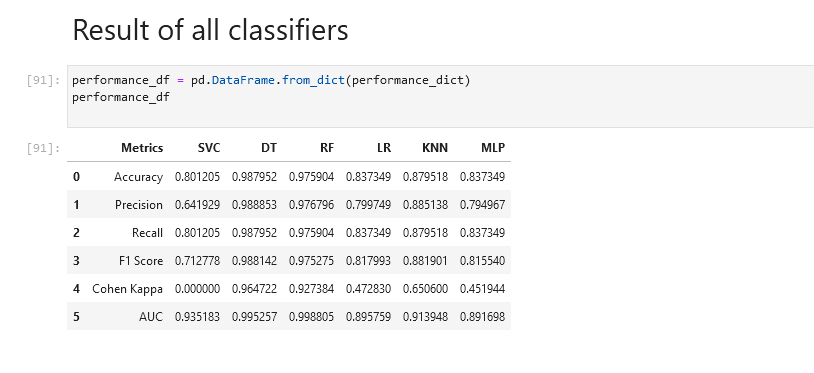

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.943396,0.905660,0.830189
1,Precision,0.947552,0.913747,0.825707
2,Recall,0.943396,0.905660,0.830189
3,F1 Score,0.937948,0.908339,0.826754
4,Cohen Kappa,0.905301,0.847876,0.719081
5,AUC,0.980837,0.958783,0.938114


# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.895455,0.890476,0.858009
1,Precision,0.942498,0.913747,0.887596
2,Recall,0.943396,0.905660,0.886792
3,F1 Score,0.942200,0.908339,0.883346
4,Cohen Kappa,0.906909,0.847876,0.810827
5,AUC,0.988805,0.962571,0.973208


# Extracting Result

In [45]:
performance_df = performance_df.transpose()
performance_df.to_csv("CSV/MI 80-20 Applying all features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("CSV/MI 80-20 Applying Hyperparameter all Features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

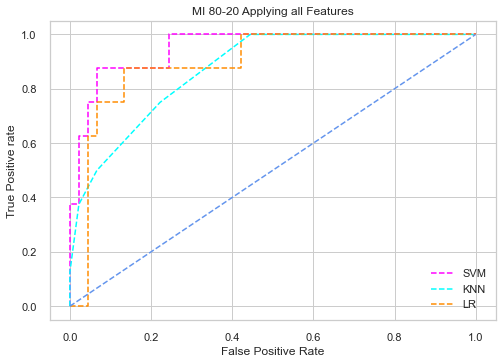

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('MI 80-20 Applying all Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("ROC/MI 80-20 Applying all Features.png", dpi=300)

plt.show();